In [1]:
from sklearn.preprocessing import StandardScaler
#from factor_analyzer import FactorAnalyzer, calculate_kmo
from scipy.stats import bartlett
import pandas as pd
from sklearn.preprocessing import StandardScaler
#from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pingouin as pg
import seaborn as sns

In [2]:
data_path = "data_cleaned_feature_31.csv"
data = pd.read_csv(data_path)
print(data.columns)
data.shape

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description',
       'engagement_rate', 'time_difference', 'video_duration_seconds'],
      dtype='object')


(149885, 31)

In [3]:
# drop duplicates
data = data.drop(['video_trending_country'],axis=1).drop_duplicates()
data.shape

(114683, 30)

In [4]:
data.select_dtypes(include=['int64', 'float64'])

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count,engagement_rate,video_duration_seconds
0,156272.0,4615.0,238.0,46473647,321000,207,0.031055,774.0
1,2148646.0,222346.0,11225.0,6395292,158000,61,0.108706,317.0
2,1106491.0,44317.0,2406.0,2807917957,8880000,1612,0.042226,2223.0
3,1185486.0,25373.0,2664.0,122939495,389000,635,0.023650,1297.0
4,69035.0,4346.0,125.0,85074466,436000,1429,0.064764,1269.0
...,...,...,...,...,...,...,...,...
149880,8548359.0,378107.0,3089.0,5592638348,12500000,1019,0.044593,24.0
149881,22553412.0,623924.0,7208.0,6331232520,8890000,480,0.027984,15.0
149882,63090147.0,2451904.0,3598.0,33506017412,44400000,3136,0.038921,15.0
149883,765386.0,27876.0,716.0,42201127,379000,809,0.037356,6566.0


In [5]:
duplicate_summary = {
    "Total Rows": len(data),
    "Duplicate Rows (Entire Row)": data.duplicated().sum(),
    "Duplicate Video IDs": data.duplicated(subset=['video_id']).sum()
}
duplicate_summary 

{'Total Rows': 114683,
 'Duplicate Rows (Entire Row)': 0,
 'Duplicate Video IDs': 96373}

In [6]:
data.duplicated(subset=['video_id'])

0         False
1         False
2         False
3         False
4         False
          ...  
149880     True
149881     True
149882     True
149883     True
149884     True
Length: 114683, dtype: bool

In [7]:
data.drop_duplicates(subset=['video_id'])

,video_id,video_published_at,video_trending__date,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,video_duration,...,channel_country,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description,engagement_rate,time_difference,video_duration_seconds
0,F5BuWCRx9bY,2024-10-10 16:19:23,2024-10-16,UCQKpp1etxGeY-NC2bXRtUAA,NDARO ALIVOMPIGA HELA STEVE MWEUSI UTACHEKA,#ndaro #chekatu #stevemweusi #comedy #funny #w...,https://i.ytimg.com/vi/F5BuWCRx9bY/default.jpg,Comedy,NaN,PT12M54S,...,Tanzania,46473647,321000,False,207,Ndaro Tz,East African Comedian,0.031055,5 days 07:40:37,774.0
1,xJvfULLGjQE,2024-10-06 17:48:07,2024-11-02,UCoZnEQMqVvv_DkF50fupMKw,Bassem Youssef & Amjad Al-Nour - Bibi’s Trial ...,Bassem Youssef & Amjad Al-Nour - Bibi’s Trial ...,https://i.ytimg.com/vi/xJvfULLGjQE/default.jpg,Music,"باسم,يوسف,البرنامج,bassem,basem,youssef,yousef...",PT5M17S,...,Egypt,6395292,158000,False,61,Bassem Youssef,"Comedian, political satirist,vegan,documentary...",0.108706,26 days 06:11:53,317.0
2,RN5maxRpI_s,2024-11-22 16:00:20,2024-11-26,UCL6JmiMXKoXS6bpP1D3bk8g,Nitrous vs Supercharger | HiLow,Thanks to Allstate for sponsoring today’s epis...,https://i.ytimg.com/vi/RN5maxRpI_s/default.jpg,Autos & Vehicles,"donut,donut media,cars,james pumphrey,up to sp...",PT37M3S,...,United States,2807917957,8880000,False,1612,Donut,it's ok to like cars\n,0.042226,3 days 07:59:40,2223.0
3,m2CzFycwLuk,2024-11-15 18:00:06,2024-11-19,UCTXpFhlF-SPNMiyATwVq95Q,ВС РФ Зашли В Черниговскую Область🎖 Началось З...,В этом видео мы обсудим с Вами ситуацию в Укра...,https://i.ytimg.com/vi/m2CzFycwLuk/default.jpg,News & Politics,NaN,PT21M37S,...,Belarus,122939495,389000,False,635,Военные Сводки,На этом канале Вы можете найти всю необходимую...,0.023650,3 days 05:59:54,1297.0
4,DNkWGG3iFks,2024-11-06 21:32:42,2024-11-10,UCtNu0UG8PyYGeHKxu1HypyA,اول مره تجيلى بعد الجواز بتقولى اكلك وحشنى عم...,No description available,https://i.ytimg.com/vi/DNkWGG3iFks/default.jpg,Education,NaN,PT21M9S,...,Egypt,85074466,436000,False,1429,وصفه فى مطبخي,كل ما يخص المطبخ والبيت,0.064764,3 days 02:27:18,1269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149685,tJ9D9xXRYQc,2024-10-24 03:26:46,2024-10-26,UC2cuK3qB1LqEXKJlangmVzQ,TERIMAKASIH BANYAK SEMUANYA !!!,No description available,https://i.ytimg.com/vi/tJ9D9xXRYQc/default.jpg,People & Blogs,NaN,PT11M43S,...,Unknown,33563535,357000,False,228,Navile mungil,No localized description available,0.060655,1 days 20:33:14,703.0
149704,Udo0kXIL7Fc,2024-10-01 12:27:58,2024-10-15,UCHUgd2j9_RTxt4CF4JJhqNQ,"У той момент вбили і мене, морально, фізично, ...",______________________________________________...,https://i.ytimg.com/vi/Udo0kXIL7Fc/default.jpg,News & Politics,"Суспільне Одеса,суспільне одеса,новини одеси,н...",PT56S,...,Ukraine,78380425,130000,False,12394,Суспільне Одеса,Офіційний канал Суспільного мовника \nСайт: su...,0.058834,13 days 11:32:02,56.0
149725,HZcpFYk7gS8,2024-11-18 17:00:28,2024-11-26,UCJIl08OJstq_9kgI9wf_xjg,Affaire Concul ! - Groland - CANAL+,L'intégralité de Groland est sur myCANAL : can...,https://i.ytimg.com/vi/HZcpFYk7gS8/default.jpg,Comedy,"Canal +,canalplus,canal,Groland,Jules Edouard ...",PT2M1S,...,France,248901984,337000,False,1479,Groland,"En direct de la Présipauté, des sketchs, des p...",0.013274,7 days 06:59:32,121.0
149737,eZfEVTlfc24,2024-11-21 13:00:49,2024-11-23,UCy3NetwuOLVhethwACfWL8w,PRO BOOSTS by LEGENDS in Standoff 2! | Tips & ...,GET 10 FABLE BOXES using the promo code in the...,https://i.ytimg.com/vi/eZfEVTlfc24/default.jpg,Howto & Style,"axlebolt,clan,code,counter strike,fps,gold,mul...",PT3M18S,...,United States,718009,21100,False,20,Standoff 2: Headshot Club,Standoff 2: Headshot Club is the must-have cha...,0.034681,1 days 10:59:11,198.0


In [8]:
text_features = ['video_description', 'video_title']

def clean_text_column(column):
    """Clean a text column by filling nulls and removing special characters."""
    return (
        column.fillna("")  # Fill missing values with empty string
        .str.replace(r"[^\w\s]", " ", regex=True)  # Remove special characters
        .str.lower()  # Convert to lowercase
        .str.strip()  # Remove leading/trailing spaces
    )

for text_feature in text_features:
    data[text_feature] = clean_text_column(data[text_feature])

In [9]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
sentence_embeddings = {}
for text_feature in text_features:
    text_data = data[text_feature].tolist()
    embeddings = model.encode(text_data, show_progress_bar=True)
    sentence_embeddings[text_feature] = pd.DataFrame(
        embeddings, 
        columns=[f"{text_feature}_dim{i}" for i in range(embeddings.shape[1])]
    )

Batches:   0%|          | 0/3584 [00:00<?, ?it/s]

Batches:   0%|          | 0/3584 [00:00<?, ?it/s]

In [10]:
embedded_text = pd.concat(sentence_embeddings.values(), axis=1)

In [11]:
def time_to_seconds(time_str):
    days, time_part = time_str.split(" days ")
    days = int(days)
    h, m, s = map(int, time_part.split(":"))
    total_seconds = days * 86400 + h * 3600 + m * 60 + s
    return total_seconds

data['time_to_trend_difference_seconds'] = data['time_difference'].apply(time_to_seconds)
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']
data['is_weekend'] = pd.to_datetime(data['video_published_at']).dt.weekday >= 5

In [12]:
data['is_trending'] = data['time_difference'].apply(
    lambda x: 1 if int(x.split(" ")[0]) <= 1 else 0 
)
data.is_trending.value_counts() ## checking how fast videos are trending

is_trending
0    102425
1     12258
Name: count, dtype: int64

In [13]:
# do split (" ") and take the first element

data["time_difference_days"] = data["time_difference"].apply(lambda x: int(x.split(" ")[0]))
data["time_difference_days"]

0          5
1         26
2          3
3          3
4          3
          ..
149880    19
149881    10
149882    24
149883     4
149884    18
Name: time_difference_days, Length: 114683, dtype: int64

In [14]:
data.shape

(114683, 36)

In [15]:
# hstack embedded_text and data
data = pd.concat([data, embedded_text], axis=1)
data.shape

(137490, 804)

In [16]:
majority_class = data[data['is_trending'] == 0]
minority_class = data[data['is_trending'] == 1]
# shape
majority_class.shape, minority_class.shape

((102425, 804), (12258, 804))

In [17]:
from sklearn.utils import resample


minority_upsampled = resample(minority_class, 
                              replace=True,     
                              n_samples=int(round(len(majority_class) * 0.3, -2)),  
                              random_state=42)  

data = pd.concat([majority_class, minority_upsampled])
data.is_trending.value_counts()

is_trending
0.0    102425
1.0     30700
Name: count, dtype: int64

In [18]:
pd.concat([majority_class, minority_upsampled]).shape

(133125, 804)

In [19]:
data['channel_published_at'] = pd.to_datetime(data['channel_published_at'], errors='coerce').dt.tz_localize(None)
data['video_published_at'] = pd.to_datetime(data['video_published_at'], errors='coerce').dt.tz_localize(None)
data['channel_video_channel_publish_difference'] = (data['video_published_at'] - data['channel_published_at']).dt.days
data['channel_video_channel_publish_difference']

0        2939.0
1           NaN
2        3423.0
3           NaN
4           NaN
          ...  
92269    4032.0
34195    2373.0
13934    2105.0
5325     4786.0
48673    3762.0
Name: channel_video_channel_publish_difference, Length: 133125, dtype: float64

In [20]:
data['channel_published_at']

0       2016-09-23 08:16:40
1                       NaT
2       2015-07-09 18:57:30
3                       NaT
4                       NaT
                ...        
92269   2013-10-04 23:11:13
34195   2018-05-07 10:18:52
13934   2019-01-13 13:43:18
5325    2011-10-03 14:00:47
48673   2014-07-23 12:35:37
Name: channel_published_at, Length: 133125, dtype: datetime64[ns]

In [21]:
data['video_published_at']

0       2024-10-10 16:19:23
1       2024-10-06 17:48:07
2       2024-11-22 16:00:20
3       2024-11-15 18:00:06
4       2024-11-06 21:32:42
                ...        
92269   2024-10-19 03:08:54
34195   2024-11-05 06:02:32
13934   2024-10-18 14:56:28
5325    2024-11-09 21:23:57
48673   2024-11-10 11:24:33
Name: video_published_at, Length: 133125, dtype: datetime64[ns]

In [22]:
data['channel_video_channel_publish_difference'] = data['channel_video_channel_publish_difference'].fillna(data['channel_video_channel_publish_difference'].mean()) # di ko na alam kung tama to

In [23]:
# import SMOTENN 
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=42)

In [24]:
data['is_trending'].value_counts()

is_trending
0.0    102425
1.0     30700
Name: count, dtype: int64

In [25]:
data['is_weekend'].value_counts()

is_weekend
False    94224
True     38901
Name: count, dtype: int64

In [26]:
# features = [
#     'video_duration_seconds', 'channel_video_count',
#     'video_category_id', 'video_trending_country', 'is_weekend',
#     'video_definition', 'video_dimension', 'video_licensed_content',
#     'channel_country', 'channel_have_hidden_subscribers','channel_video_channel_publish_difference'
# ]


In [27]:
data.channel_have_hidden_subscribers

0        False
1        False
2        False
3        False
4        False
         ...  
92269    False
34195    False
13934    False
5325     False
48673    False
Name: channel_have_hidden_subscribers, Length: 133125, dtype: object

In [28]:
# data['is_trending'] = data['time_difference'].apply(
#     lambda x: 1 if int(x.split(" ")[0]) <= 3 else 0
# )

In [29]:
embedded_text_columns = embedded_text.columns.tolist()
# embedded_text_columns

In [30]:
categorical_features = [
    'video_category_id', 'is_weekend',
    'video_definition', 'video_dimension', 'video_licensed_content',
    'channel_country', 'channel_have_hidden_subscribers'
]
numerical_features = [
    'video_duration_seconds', 'channel_video_count', 'channel_video_channel_publish_difference'
]

In [31]:
X_categorical = data[categorical_features]
X_numerical = data[numerical_features]
X_text = data[embedded_text_columns]
y = data['is_trending']

In [32]:
X_categorical.shape

(133125, 7)

In [33]:
X_text.shape

(133125, 768)

In [41]:
import numpy as np
X = pd.concat((X_numerical, X_categorical, X_text),axis=1)
X.shape

(133125, 778)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]

X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

X_train_text = X_train[embedded_text_columns]
X_test_text = X_test[embedded_text_columns]

In [44]:
from feature_engine.encoding import DecisionTreeEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import MeanEncoder

encoder = DecisionTreeEncoder(regression=False)
X_train_encode = encoder.fit_transform(X_train_categorical, y_train)
X_test_encode = encoder.transform(X_test_categorical)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)
# X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [46]:
X_train = np.hstack((X_train_encode, X_train_scaled, X_train_text))
X_test = np.hstack((X_test_encode, X_test_scaled, X_test_text))

video title/ desc without country / nonscaled embeddings

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9202513896539637
[[29189  1515]
 [ 1670  7564]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     30704
         1.0       0.83      0.82      0.83      9234

    accuracy                           0.92     39938
   macro avg       0.89      0.88      0.89     39938
weighted avg       0.92      0.92      0.92     39938



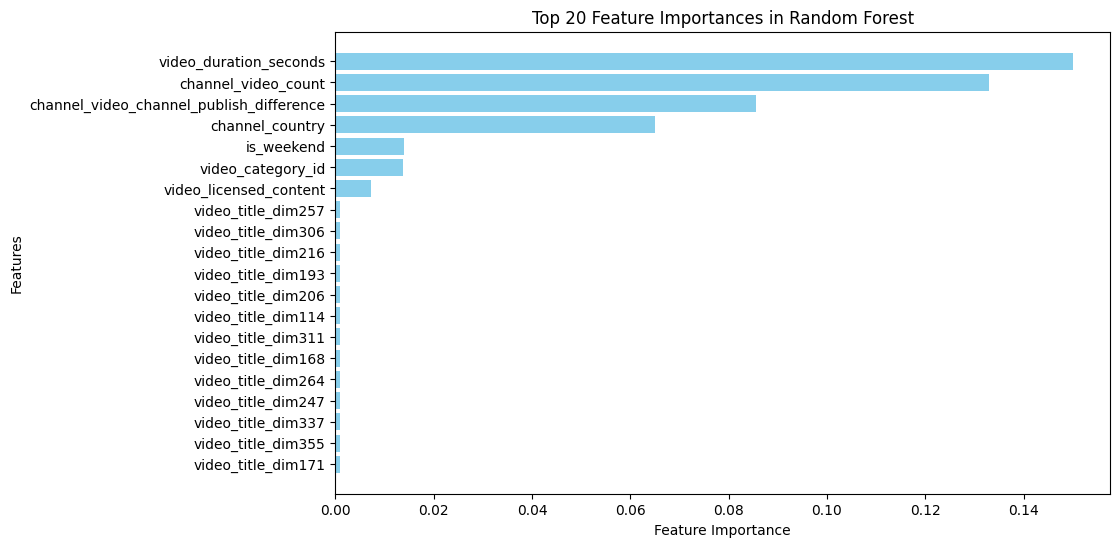

In [60]:
feature_names = pd.concat([data[categorical_features],data[numerical_features],data[embedded_text_columns]]).columns
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_features = importance_df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  
plt.show()

In [61]:
importance_df['Prefix'] = importance_df['Feature'].str.extract(r'(video_description|video_title)')

# Group by the extracted prefix and sum the importance values
aggregated_importance = importance_df.groupby('Prefix')['Importance'].sum().reset_index()

# Rename columns for clarity
aggregated_importance.columns = ['Feature Prefix', 'Total Importance']

In [62]:
aggregated_importance

,Feature Prefix,Total Importance
0,video_description,0.214172
1,video_title,0.316329


In [63]:
aggregated_data = pd.DataFrame({
    'Feature': ['video_description (aggregated)', 'video_title (aggregated)'],
    'Importance': [0.214172, 0.316329]
})

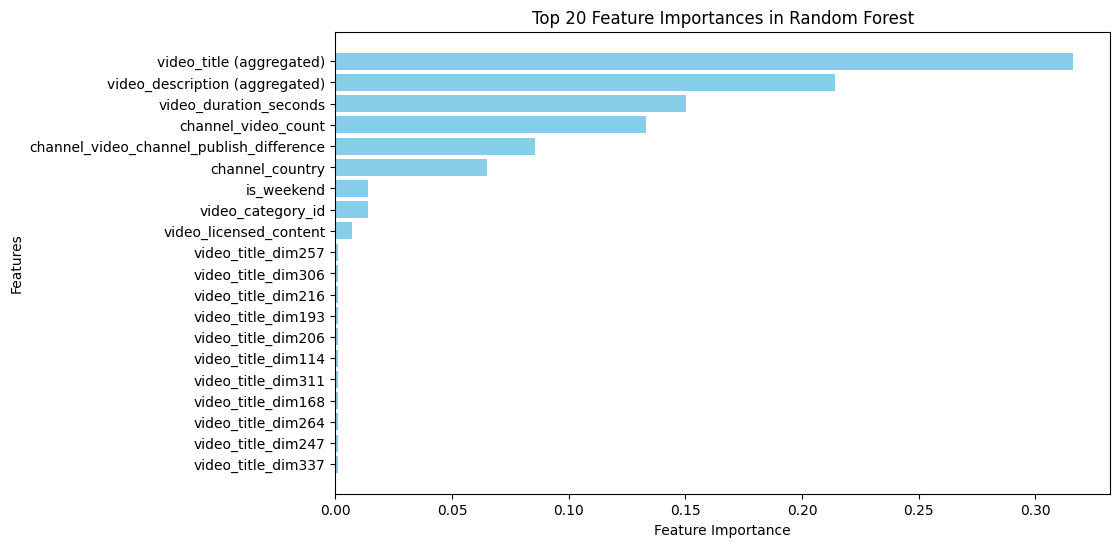

In [65]:
combined_features = pd.concat([top_features, aggregated_data], ignore_index=True)
combined_features = combined_features.sort_values(by='Importance', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(combined_features['Feature'], combined_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [ ]:
shap_values = explainer.shap_values(X_sampled_test)

In [ ]:
shap_values = explainer.shap_values(X_sampled_test)
shap.summary_plot(shap_values[1], X_test_scaled, feature_names=feature_names)

video title/ desc with country

In [193]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy}")
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9184363663845224
[[37469  3137]
 [ 1180 11142]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     40606
           1       0.78      0.90      0.84     12322

    accuracy                           0.92     52928
   macro avg       0.87      0.91      0.89     52928
weighted avg       0.93      0.92      0.92     52928



In [208]:
data[embedded_text_columns].shape

(176424, 768)

In [ ]:
data[categorical_features]
data[numerical_features]
data[embedded_text_columns]

In [211]:
feature_names = pd.concat([data[categorical_features],data[numerical_features],data[embedded_text_columns]]).columns

In [212]:
feature_importances = model.feature_importances_

In [214]:
feature_importances.shape

(779,)

In [213]:
len(feature_names)

779

In [215]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 20 features
top_features = importance_df.head(20)

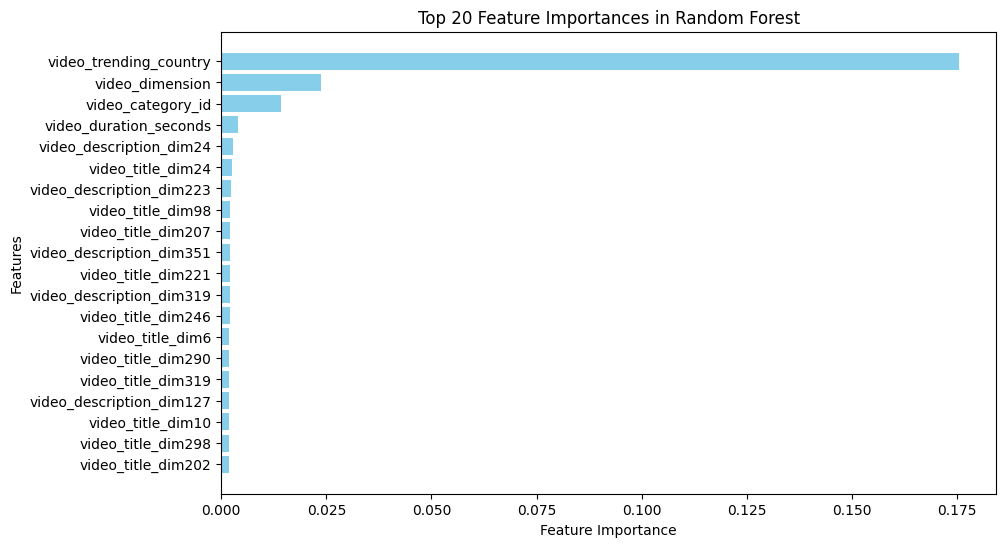

In [216]:
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

video desc / title / glove

In [199]:
data

,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,video_title_dim375,video_title_dim376,video_title_dim377,video_title_dim378,video_title_dim379,video_title_dim380,video_title_dim381,video_title_dim382,video_title_dim383,channel_video_channel_publish_difference
0,F5BuWCRx9bY,2024-10-10 16:19:23,2024-10-16,Tanzania,UCQKpp1etxGeY-NC2bXRtUAA,ndaro alivompiga hela steve mweusi utacheka,ndaro chekatu stevemweusi comedy funny wa...,https://i.ytimg.com/vi/F5BuWCRx9bY/default.jpg,Comedy,NaN,...,0.052038,0.011442,0.041564,0.002116,0.062815,0.090188,0.021328,-0.030839,-0.050243,2939.000000
1,xJvfULLGjQE,2024-10-06 17:48:07,2024-11-02,Iraq,UCoZnEQMqVvv_DkF50fupMKw,bassem youssef amjad al nour bibi s trial ...,bassem youssef amjad al nour bibi s trial ...,https://i.ytimg.com/vi/xJvfULLGjQE/default.jpg,Music,"باسم,يوسف,البرنامج,bassem,basem,youssef,yousef...",...,0.075022,0.092405,-0.005706,-0.039031,-0.011297,0.110390,-0.003291,0.018915,-0.052395,3993.923086
2,RN5maxRpI_s,2024-11-22 16:00:20,2024-11-26,Canada,UCL6JmiMXKoXS6bpP1D3bk8g,nitrous vs supercharger hilow,thanks to allstate for sponsoring today s epis...,https://i.ytimg.com/vi/RN5maxRpI_s/default.jpg,Autos & Vehicles,"donut,donut media,cars,james pumphrey,up to sp...",...,0.035021,-0.068079,0.005821,0.002878,-0.004581,0.117938,-0.014508,0.053138,0.074979,3423.000000
3,m2CzFycwLuk,2024-11-15 18:00:06,2024-11-19,Russia,UCTXpFhlF-SPNMiyATwVq95Q,вс рф зашли в черниговскую область началось з...,в этом видео мы обсудим с вами ситуацию в укра...,https://i.ytimg.com/vi/m2CzFycwLuk/default.jpg,News & Politics,NaN,...,0.037068,0.034959,-0.037604,-0.059063,-0.002642,-0.037778,-0.037291,-0.060310,0.006313,3993.923086
4,DNkWGG3iFks,2024-11-06 21:32:42,2024-11-10,Egypt,UCtNu0UG8PyYGeHKxu1HypyA,اول مره تجيلى بعد الجواز بتقولى اكلك وحشنى عم...,no description available,https://i.ytimg.com/vi/DNkWGG3iFks/default.jpg,Education,NaN,...,0.045751,0.045610,-0.090647,0.005257,-0.015008,0.107871,-0.026175,-0.026161,-0.063542,3993.923086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,RuNGkryK6ws,2024-11-10 13:01:23,2024-11-11,Russia,UCStv7__4KQ47SUx7vi3SzoQ,итальянец пробует пиццу хот дог от kushat,no description available,https://i.ytimg.com/vi/RuNGkryK6ws/default.jpg,People & Blogs,NaN,...,0.069221,0.098415,-0.039153,-0.093068,-0.065263,-0.080465,0.031674,0.034770,-0.000679,3993.923086
32731,S0-mMeAErIM,2024-11-13 09:30:08,2024-11-14,South Korea,UCzpmbFPlNij2V8pIseMmQ2Q,eng 이시언 오빠가 이래서 우리가 손절설이 돌잖아 손절설 해...,야외로 나온 나래식 \n가을 맞이 우중 캠핑 왔어요 \n\n오늘은 일 안 하고...,https://i.ytimg.com/vi/S0-mMeAErIM/default.jpg,Entertainment,"이시언,시언's쿨,시언스쿨,찐친,나래식,박나래,나래바,박나래 유튜브,코빅,코미디빅리...",...,-0.055300,-0.037571,-0.019244,-0.041743,-0.015384,-0.047727,-0.017900,-0.008656,-0.021469,3993.923086
132841,87J4QqsLyyc,2024-11-20 02:14:13,2024-11-22,Guatemala,UC72ZaBKI-Bo5fjmWEYonhJw,argentina 1 0 perú eliminatorias sudameric...,la selección argentina cerró su 2024 con una v...,https://i.ytimg.com/vi/87J4QqsLyyc/default.jpg,Sports,"TyC,Sports,TyC Sports,messi,messi seleccion ar...",...,-0.021557,-0.008307,-0.062348,0.019665,0.079426,0.033415,-0.021473,0.026502,-0.020512,4233.000000
113650,jl98XJmkzf0,2024-11-04 18:02:32,2024-11-06,Morocco,UCzTMWdo-wxySmYXAM4kYgaw,مشيت نعاون عائلتي غرقو في فيضان فلينسيا و لكن ...,يمنع اعادة رفع الفديو على اليوتيوب جميع الح...,https://i.ytimg.com/vi/jl98XJmkzf0/default.jpg,Entertainment,"فيضانات إسبانيا,فيضانات اوروبا,فيضانات اسبانيا...",...,-0.049197,0.042136,-0.066461,0.094273,-0.009315,0.163570,-0.009212,-0.059182,-0.052894,2567.000000


In [196]:
feature_importances.shape

(779,)

In [149]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy}")
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9125793530834341
[[37046  3560]
 [ 1067 11255]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     40606
           1       0.76      0.91      0.83     12322

    accuracy                           0.91     52928
   macro avg       0.87      0.91      0.89     52928
weighted avg       0.92      0.91      0.92     52928



video description / video tags / video title

In [96]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy}")
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9127305018137848
[[37041  3565]
 [ 1054 11268]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     40606
           1       0.76      0.91      0.83     12322

    accuracy                           0.91     52928
   macro avg       0.87      0.91      0.89     52928
weighted avg       0.92      0.91      0.92     52928



video description / video tags

In [50]:
from sklearn.ensemble import RandomForestClassifier
# adjust class weights
# parameters for random_forest classifier

model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9112001209189843


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36959  3647]
 [ 1053 11269]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     40606
           1       0.76      0.91      0.83     12322

    accuracy                           0.91     52928
   macro avg       0.86      0.91      0.88     52928
weighted avg       0.92      0.91      0.91     52928



<Axes: >

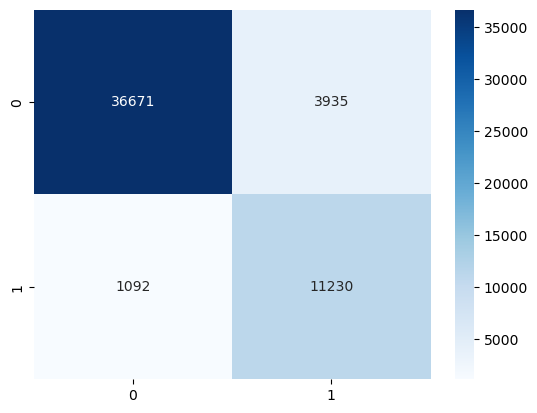

In [75]:
# heatmap confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [39]:
data.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description',
       'engagement_rate', 'time_difference', 'video_duration_seconds',
       'time_to_trend_difference_seconds', 'likes_per_view',
       'comments_per_view', 'is_weekend', 'is_trending',
       'time_difference_days', 'channel_video_channel_publish_difference'],
      dtype='object')

In [35]:
importance = model.feature_importances_
feature_importance = pd.DataFrame(importance, index=features, columns=['importance']).sort_values('importance', ascending=False)
feature_importance

,importance
channel_video_count,0.455299
video_duration_seconds,0.289840
video_category_id,0.178292
is_weekend,0.040236
video_trending_country,0.009069
video_definition,0.008931
channel_have_hidden_subscribers,0.008912
channel_country,0.008286
video_dimension,0.001136
video_licensed_content,0.000000


<Figure size 1000x800 with 0 Axes>

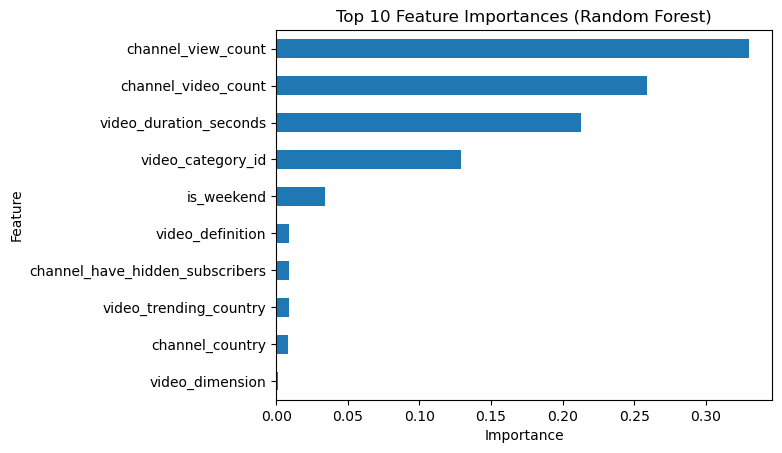

In [36]:
plt.figure(figsize=(10, 8))
feature_importance.head(10).plot(kind='barh', legend=False)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

In [254]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [255]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

In [256]:
input_size = X_train_tensor.shape[1]
num_classes = len(np.unique(y_train_tensor))

In [257]:
model = NeuralNetwork(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [258]:
num_epochs = 100
batch_size = 64


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [259]:
model.train()
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.5139
Epoch [20/100], Loss: 0.5357
Epoch [30/100], Loss: 0.4657
Epoch [40/100], Loss: 0.5624
Epoch [50/100], Loss: 0.5226
Epoch [60/100], Loss: 0.4857
Epoch [70/100], Loss: 0.2354
Epoch [80/100], Loss: 0.3308
Epoch [90/100], Loss: 0.5864
Epoch [100/100], Loss: 0.5217


In [261]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)

accuracy = (y_pred_classes == y_test_tensor).sum().item() / len(y_test_tensor)
print(f"Model Accuracy: {accuracy:.4f}")

y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred_classes.numpy()
print(confusion_matrix(y_test_np, y_pred_np))
print(classification_report(y_test_np, y_pred_np))

Model Accuracy: 0.7219
[[37522  3010]
 [13981  6575]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82     40532
           1       0.69      0.32      0.44     20556

    accuracy                           0.72     61088
   macro avg       0.71      0.62      0.63     61088
weighted avg       0.71      0.72      0.69     61088

